In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

import numpy as np
import pandas as pd
import time

In [2]:
service = Service('./pandas/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = service)

In [3]:
url = 'http://search.danawa.com/dsearch.php?k1={}&module=goods&act=dispMain'.format('무선청소기')
driver.get(url)

In [4]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

soup

<html class="js no-touch" lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head>
<title>무선청소기 : 다나와 통합검색</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="무선청소기 통합검색 : 다나와 통합검색" name="title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." name="description"/>
<meta content="무선청소기, 다나와, 최저가, 가격비교, 검색, 통합검색, 샤오미 무선청소기, 차이슨 무선청소기, 다이슨 무선청소기, 무선청소기 삼성전자, 일렉트로룩스 무선청소기, 무선청소기 아이닉 i20, 디베아 차이슨 무선청소기 2021년형, 무선청소기 테팔, 삼성 비스포크 제트 무선청소기, 디베아 무선청소기" name="keywords"/>
<meta content="무선청소기 통합검색 : 다나와 통합검색" property="og:title"/>
<meta content="'무선청소기'의 다나와 통합검색 결과입니다." property="og:description"/>
<meta content="http://img.danawa.com/new/tour/img/logo/sns_danawa.jpg" property="og:image"/>
<meta content="width=1280" name="viewport"/>
<link href="//img.danawa.com/new/danawa_main/v1/img/danawa_favicon.ico" rel="shortcut icon"/>
<link href="//static.danawa.com/css/common.css?v=2201051636" rel="styleshee

In [5]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')

# prod_items[0].select('a.click_log_product_standard_title_')[0].text
title = prod_items[0].select('p.prod_name > a')[0].text
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].\
text.strip().replace(',','')
print (title, spec_list, price + '원')

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571 핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm 1057790원


In [6]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')

prod_items[0].select('div.prod_info > p > a')[0].text

'LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571'

In [7]:
prod_data = []

for prod_item in prod_items:
    try:
        title = prod_item.select('p.prod_name > a')[0].text
    except:
        title = ''
        
    try:
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
        
    try:
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].\
        text.strip().replace(',','')
    except:
        price = 0
        
    mylist = [title, spec_list, price]
    
    prod_data.append(mylist)
    
prod_data[0:5]

[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057790'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '571180'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [8]:
prod_data[0]

['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
 '1057790']

In [9]:
def get_prod_items(prod_items):
    prod_data = []

    for prod_item in prod_items:
        try:
            title = prod_item.select('p.prod_name > a')[0].text
        except:
            title = ''

        try:
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''

        try:
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].\
            text.strip().replace(',','')
        except:
            price = 0

        mylist = [title, spec_list, price]

        prod_data.append(mylist)
    
    return(prod_data)

In [10]:
prod_data = get_prod_items(prod_items)
print(len(prod_data))

44


In [11]:
prod_data[:5]

[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057790'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '571180'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [12]:
# http://search.danawa.com/dsearch.php?k1=무선청소기
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods
# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods

# http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods

In [13]:
def get_search_page_url(keyword, page):
    url = 'http://search.danawa.com/dsearch.php?query={}&originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods'\
    .format(keyword, keyword, page)
    return url

In [14]:
def get_search_page_url(keyword, page):
    url = 'http://search.danawa.com/dsearch.php?query={0}&originalQuery={0}&volumeType=allvs&page={1}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods'\
    .format(keyword, page)
    return url

In [15]:
url = get_search_page_url('무선청소기', '1')
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390097&tab=goods


In [16]:
import time
from tqdm import tqdm_notebook

In [17]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1, total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total +prod_item_list

C:\Users\kth96\AppData\Local\Temp/ipykernel_11012/608936515.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [18]:
prod_data_total[:5]

[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057790'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '571180'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [19]:
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']

data.to_excel('./pandas/7_Best_Product/files/1_danawa_crawling_result_class.xlsx',
             index = False)

In [22]:
data.replace("", np.nan, inplace = True)
data.dropna(inplace = True)

data.shape

(410, 3)

In [23]:
# 회사명 분리
# data['상품명']

company_list = []
product_list = []


for title in data['상품명']:
    try:
        title_info = title.split(' ',1)
        company_name = title_info[0]
        product_name = title_info[1]
        company_list.append(company_name)
        product_list.append(product_name)
    except:
#         pass
        company_list.append(None)
        product_list.append(None)

In [24]:
# company_list
len(company_list)
len(product_list)

410

In [25]:
data['스펙 목록']

0      핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...
1      핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...
2      핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...
3      차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...
4      핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...
                             ...                        
435    핸디/스틱청소기 / 스틱형 / 무선형 / [성능] 싸이클론 / [배터리] 충전시간:...
436    핸디/스틱청소기 / 스틱형 / 무선형 / 물걸레 / 소비전력: 17W / [배터리]...
437    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / [배터리] 충전시간: 8~10시간 /...
438    핸디/스틱청소기 / 스틱형 / 무선형 / 흡입전용 / [배터리] 충전시간: 6시간 ...
439    핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / 소비전력: 13.5W /...
Name: 스펙 목록, Length: 410, dtype: object

In [26]:
spec_list = data['스펙 목록'][0].split(' / ')
category = spec_list[0].strip()

In [27]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm'

In [28]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec

print(use_time_spec)
print(suction_spec)

use_time_value = use_time_spec.split(': ')[1].strip()
suction_value = suction_spec.split(': ')[1].strip()

print(use_time_value)
print(suction_value)

사용시간(개당): 1시간
[성능] 흡입력: 210W
1시간
210W


In [29]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    
    category = spec_list[0].strip()
    category_list.append(category)
    
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_spec = spec
        elif '흡입력' in spec:
            suction_spec = spec
        
        
    use_time_value = use_time_spec.split(': ')[1].strip()
    suction_value = suction_spec.split(': ')[1].strip()
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [30]:
print(category_list[:5])
print(use_time_list[:5])
print(suction_list[:5])

['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기']
['1시간', '1시간', '1시간', '30분', '1시간']
['210W', '210W', '210W', '16,800Pa', '210W']


In [31]:
mytime = '1시간 30분'
mytime.split('시간')[0]
# mytime.split('시간')[-1].replace('분','')
mytime.split('시간')[-1].split('분')[0]

' 30'

In [32]:
def convert_time_minute(time):
    
    try:
        if '시간' in time:
            hour = time.split('시간')[0]

            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0

        else:
            hour = 0
            minute = time.split('분')[0]
            
        return int(hour)*60 + int(minute)
            
    except:
        return None

In [33]:
time = '1시간 40분'

result = convert_time_minute(time)
result

100

In [34]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
new_use_time_list[:10]

[60, 60, 60, 30, 60, 60, 60, 45, 60, 60]

In [35]:
suction_list[:20]

['210W',
 '210W',
 '210W',
 '16,800Pa',
 '210W',
 '210W',
 '20000Pa',
 '15,000Pa',
 '22000Pa',
 '210W',
 '210W',
 '210W',
 '151AW',
 '140W',
 '210W',
 '210W',
 '13,000Pa',
 '8,000Pa',
 '22000Pa',
 '200W']

In [36]:
# mystring = suction_list[0].upper()

def get_suction(value):
    try:
        value = value.upper()
        
        if "AW" in value or "W" in value:
            result = value.replace("A","").replace("W","").replace(",","")
            result = int(result)
            
        elif "PA" in value:
            result = value.replace("PA","").replace(",","")
            result = int(result)/100
        else:
            result = None
        return result
    except:
        return None

In [37]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
    
new_suction_list[:10]

[210, 210, 210, 168.0, 210, 210, 200.0, 150.0, 220.0, 210]

In [38]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격'].astype(np.int32)
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790.0,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,571180.0,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,794020.0,60.0,210.0
3,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60590.0,30.0,168.0
4,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804720.0,60.0,210.0


In [39]:
condition = pd_data['카테고리'] == '핸디/스틱청소기'

pd_data_final = pd_data[condition]
len(pd_data_final)

# pd_data_final['가격'].replace('', np.nan, inplace = True)

# pd_data_final.to_excel('./pandas/7_Best_Product/files/2_danawa_data_final_class.xlsx',
#                       index = False)

pd_data_final.dropna(inplace = True)

pd_data_final.to_excel('./pandas/7_Best_Product/files/2_danawa_data_final_class.xlsx',
                      index = False)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [40]:
# pd_data_final.to_excel('./pandas/7_Best_Product/files/2_danawa_data_final_class.xlsx',
#                       index = False)

pd_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 409
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    260 non-null    object 
 1   회사명     260 non-null    object 
 2   제품      260 non-null    object 
 3   가격      260 non-null    float64
 4   사용시간    260 non-null    float64
 5   흡입력     260 non-null    float64
dtypes: float64(3), object(3)
memory usage: 14.2+ KB


In [41]:
danawa_data = pd.read_excel('./pandas/7_Best_Product/files/2_danawa_data_final_class.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057790,60,210
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,571180,60,210
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,794020,60,210
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804720,60,210
4,핸디/스틱청소기,샤오미,드리미 V10,49870,60,220


In [42]:
top_list = danawa_data.sort_values(["흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
139,핸디/스틱청소기,리하스,LH20,118710,120,330
201,핸디/스틱청소기,비브르,스톰파워 VE35,128000,50,310
126,핸디/스틱청소기,아이닉,NEW i20,340000,50,300
220,핸디/스틱청소기,블랙앤데커,PV1020,58080,11,290
219,핸디/스틱청소기,캐치웰,NEW F8,455380,25,290


In [43]:
top_list = danawa_data.sort_values(["사용시간"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
139,핸디/스틱청소기,리하스,LH20,118710,120,330
19,핸디/스틱청소기,샤오미,드리미 V11,50620,90,250
18,핸디/스틱청소기,샤오미,드리미 V12,67430,90,270
68,핸디/스틱청소기,샤오미,드리미 T30,27000,90,270
253,핸디/스틱청소기,샤오미,드리미 V12 프로,109000,85,270


In [44]:
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
139,핸디/스틱청소기,리하스,LH20,118710,120,330
18,핸디/스틱청소기,샤오미,드리미 V12,67430,90,270
68,핸디/스틱청소기,샤오미,드리미 T30,27000,90,270
19,핸디/스틱청소기,샤오미,드리미 V11,50620,90,250
253,핸디/스틱청소기,샤오미,드리미 V12 프로,109000,85,270


In [45]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 296174.91538461536
흡입력 평균값 168.68846153846152
사용시간 평균값 43.31923076923077


In [46]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,드리미 V10,49870,60,220
5,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D2,155700,60,210
7,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9370,124430,60,210
11,핸디/스틱청소기,삼성전자,제트 VS20T9210BF,40630,60,200
13,핸디/스틱청소기,다이슨,V15 디텍트 앱솔루트 엑스트라,38900,60,240
...,...,...,...,...,...,...
243,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,48420,65,220
246,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957G2P,129000,60,210
248,핸디/스틱청소기,DIBEA,X30,57930,50,250
253,핸디/스틱청소기,샤오미,드리미 V12 프로,109000,85,270


In [47]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
# import platform 

rc('font', family = 'Malgun Gothic')

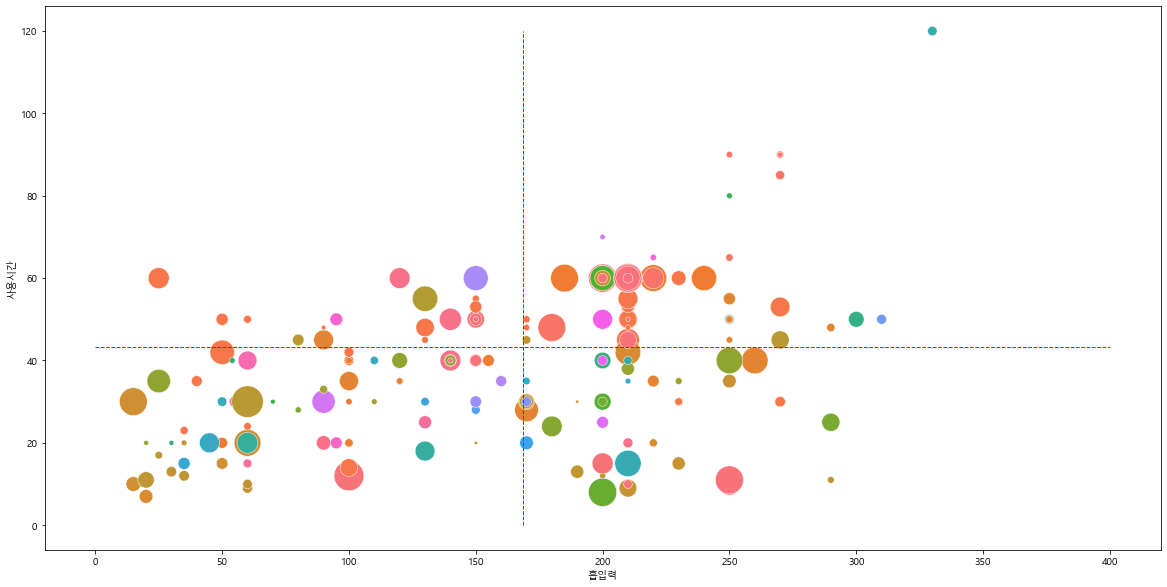

In [48]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = danawa_data['회사명'],
               data = danawa_data, legend = False,
               sizes = (10, 1000))
plt.hlines(use_time_mean_value, 0 ,400, color = 'red',
          linestyle = 'dashed', linewidth = 1)
plt.vlines(suction_mean_value, 0 ,120, color = 'red',
          linestyle = 'dashed', linewidth = 1)

plt.show()

In [49]:
chart_data_selected = top_list[:20]
chart_data_selected

,카테고리,회사명,제품,가격,사용시간,흡입력
139,핸디/스틱청소기,리하스,LH20,118710,120,330
18,핸디/스틱청소기,샤오미,드리미 V12,67430,90,270
68,핸디/스틱청소기,샤오미,드리미 T30,27000,90,270
19,핸디/스틱청소기,샤오미,드리미 V11,50620,90,250
253,핸디/스틱청소기,샤오미,드리미 V12 프로,109000,85,270
115,핸디/스틱청소기,모온,오비큠 플러스,39900,80,250
225,핸디/스틱청소기,에이스전자,에이스 K7,32430,70,200
96,핸디/스틱청소기,샤오미,G10,68000,65,250
243,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,48420,65,220
13,핸디/스틱청소기,다이슨,V15 디텍트 앱솔루트 엑스트라,38900,60,240


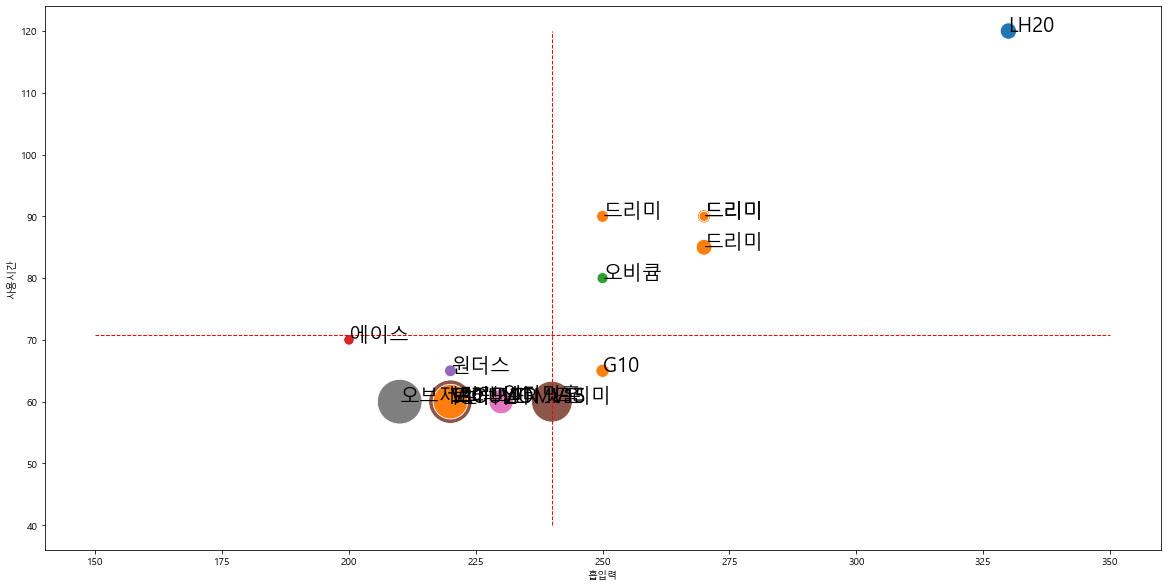

In [52]:
# suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
# use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = chart_data_selected['회사명'],
               data = chart_data_selected, legend = False,
               sizes = (100, 2000))
plt.hlines(use_time_mean_value, 150, 350, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_mean_value, 40, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
    
    
plt.show()